<a href="https://colab.research.google.com/github/aidentify/lecture/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

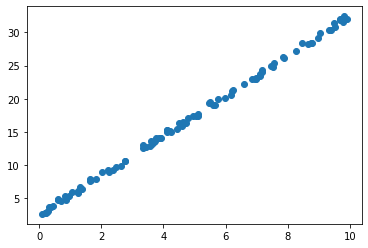

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# dataset generation
data = np.zeros((100,2))

for i in range(len(data)):
  data[i][0] = 10*np.random.rand(1)
  data[i][1] = 3*data[i,0] + 2 + np.random.rand(1)

plt.scatter(data[:,0], data[:,1])
plt.show()


iteration: 0 loss= tf.Tensor(2717.421143023798, shape=(), dtype=float64) a= 7.220033913771369 c= 19.235671440905975
iteration: 100 loss= tf.Tensor(5.00105196408546, shape=(), dtype=float64) a= 1.495427427677153 c= 12.380657215597285
iteration: 200 loss= tf.Tensor(19.071566390883962, shape=(), dtype=float64) a= 2.089760860907571 c= 8.480162209297719
iteration: 300 loss= tf.Tensor(35.827169067838355, shape=(), dtype=float64) a= 2.4465445212612984 c= 6.138660271614419
iteration: 400 loss= tf.Tensor(50.118713917472455, shape=(), dtype=float64) a= 2.66072493444033 c= 4.733035776436289
iteration: 500 loss= tf.Tensor(60.531369581641805, shape=(), dtype=float64) a= 2.789299346575854 c= 3.8892268563379226
iteration: 600 loss= tf.Tensor(67.51463342068904, shape=(), dtype=float64) a= 2.8664837128333653 c= 3.382680836344627
iteration: 700 loss= tf.Tensor(71.98690532205826, shape=(), dtype=float64) a= 2.912818176243505 c= 3.078596743063016
iteration: 800 loss= tf.Tensor(74.77620246587676, shape=(),

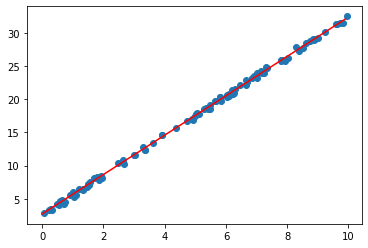

In [ ]:
# y = 3x + 2 --> y = ax + c : find a and c
# error = true - pred
# MSE loss = (true - pred)**2
def loss_funcion (a,c):
  return sum((y-a*x-c)**2 for x, y in data)

def a_grad_loss(a,c):
  return sum(2*(y-a*x-c)*(-x) for x,y in data )

def c_grad_loss(a,c):
  return sum(2*(y-a*x-c)*(-1) for x,y in data )  

a = 20.00001
c = 20.00001
lr= 0.0001 # learning rate

for i in range(1000+1):
  a = a - lr*a_grad_loss(a,c)
  c = c - lr*c_grad_loss(a,c)
  if i%100 == 0:
    print('iteration:', i, 'loss=', loss_function(a,c), 'a=', a, 'c=', c)

x_coor = []
y_coor = []
for i in range(100):
  x_coor.append (i*0.1)
  y_coor.append (a*x_coor[i] + c) 

plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration:  0 loss= tf.Tensor(12465.178, shape=(), dtype=float32) a= 19.873192 c= 19.980785
iteration:  1000 loss= tf.Tensor(48.554794, shape=(), dtype=float32) a= 0.91258305 c= 16.36873
iteration:  2000 loss= tf.Tensor(43.9093, shape=(), dtype=float32) a= 0.9910104 c= 15.69276
iteration:  3000 loss= tf.Tensor(39.72501, shape=(), dtype=float32) a= 1.0883999 c= 15.053334
iteration:  4000 loss= tf.Tensor(35.940086, shape=(), dtype=float32) a= 1.1810542 c= 14.445192
iteration:  5000 loss= tf.Tensor(32.516403, shape=(), dtype=float32) a= 1.2691758 c= 13.866797
iteration:  6000 loss= tf.Tensor(29.419493, shape=(), dtype=float32) a= 1.3529872 c= 13.316697
iteration:  7000 loss= tf.Tensor(26.618198, shape=(), dtype=float32) a= 1.4326978 c= 12.793512
iteration:  8000 loss= tf.Tensor(24.084263, shape=(), dtype=float32) a= 1.5085094 c= 12.295918
iteration:  9000 loss= tf.Tensor(21.792194, shape=(), dtype=float32) a= 1.5806121 c= 11.82267
iteration:  10000 loss= tf.Tensor(19.71888, shape=(), dtyp

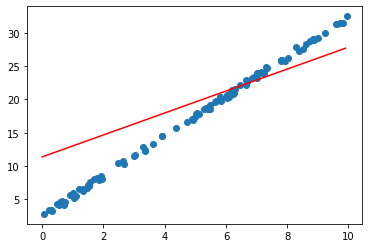

In [ ]:
import tensorflow as tf

a = tf.Variable(initial_value=20.001)
c = tf.Variable(initial_value=20.001)

x = data[:,0]
y = data[:,1]

def loss_function(x,y):
  pred = a*x+c
  return tf.reduce_mean(tf.math.square(y - pred))

optimizer = tf.optimizers.SGD(0.0001)

def train():
  with tf.GradientTape() as g:
    loss = loss_function(x,y)
  gradients = g.gradient(loss, [a,c])
  optimizer.apply_gradients(zip(gradients, [a,c]))

for i in range(10000+1):
  x = data[:,0]
  y = data[:,1]

  train()
  
  if i%1000 == 0:
    loss = loss_function(x,y)
    print('iteration: ', i, 'loss=', loss, 'a=', a.numpy(), 'c=', c.numpy())

x_coor = []
y_coor = []
a = a.numpy()
c = c.numpy()
for i in range(100):
  x_coor.append (i*0.1)
  y_coor.append (a*x_coor[i] + c) 

plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()


iteration: 0 loss= tensor(393.6485, grad_fn=<MseLossBackward>) param= tensor([[-0.0024]]) tensor([-0.4211])
iteration: 100 loss= tensor(104.7832, grad_fn=<MseLossBackward>) param= tensor([[1.6374]]) tensor([-0.1583])
iteration: 200 loss= tensor(28.7935, grad_fn=<MseLossBackward>) param= tensor([[2.4775]]) tensor([-0.0174])
iteration: 300 loss= tensor(8.7948, grad_fn=<MseLossBackward>) param= tensor([[2.9074]]) tensor([0.0609])
iteration: 400 loss= tensor(3.5231, grad_fn=<MseLossBackward>) param= tensor([[3.1270]]) tensor([0.1071])
iteration: 500 loss= tensor(2.1249, grad_fn=<MseLossBackward>) param= tensor([[3.2387]]) tensor([0.1368])
iteration: 600 loss= tensor(1.7457, grad_fn=<MseLossBackward>) param= tensor([[3.2950]]) tensor([0.1581])
iteration: 700 loss= tensor(1.6347, grad_fn=<MseLossBackward>) param= tensor([[3.3230]]) tensor([0.1749])
iteration: 800 loss= tensor(1.5942, grad_fn=<MseLossBackward>) param= tensor([[3.3365]]) tensor([0.1894])
iteration: 900 loss= tensor(1.5725, gra

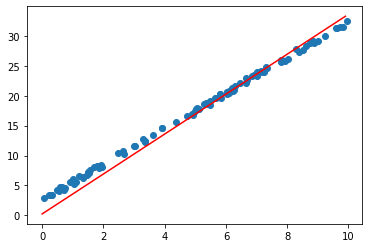

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단일 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)

x = []
y = []

for i in range(len(data)):

  lx = []
  ly = []
  for j in range(1):
    lx.append(data[i,0])
    ly.append(data[i,1])
  x.append (lx)
  y.append (ly)

in_x = torch.FloatTensor(x)
in_y = torch.FloatTensor(y)

model = Linear_Regression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) 
weight = []

for i in range(1000+1):
  pred = model(in_x)
  loss = F.mse_loss(pred, in_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if i%100 == 0:
    for param in model.parameters():
      weight.append (param.data)
    print('iteration:', i, 'loss=', loss, 'param=', weight[0], weight[1]) 

x_coor = []
y_coor = []
a = weight[0]
c = weight[1]
for i in range(100):
  x_coor.append (i*0.1)
  y_coor.append (a*x_coor[i] + c) 

plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()